In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
msd_data = pd.read_table(
    "../../data/msd/kaggle_visible_evaluation_triplets.txt",
    header=None,
    names=["userId", "songId", "repeats"],
)
users = pd.read_table("../../data/msd/kaggle_users.txt", header=None, names=["userId"])
songs = pd.read_table("../../data/msd/kaggle_songs.txt", header=None, names=["songId"])

In [3]:
msd_data

,userId,songId,repeats
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [4]:
print(f"Amount of users - {users.shape[0]}\nAmount of items - {songs.shape[0]}")

Amount of users - 110000
Amount of items - 386213


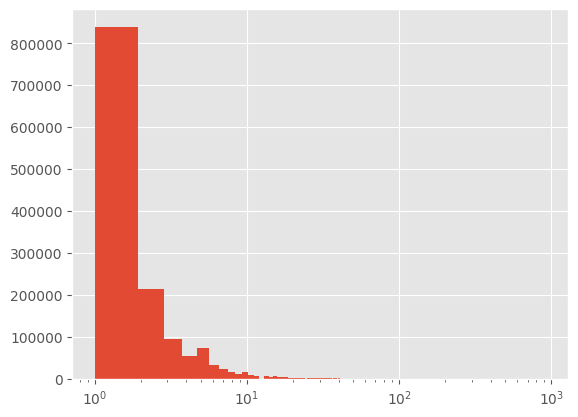

In [47]:
plt.hist(msd_data["repeats"], bins=1000)
plt.xscale("log")

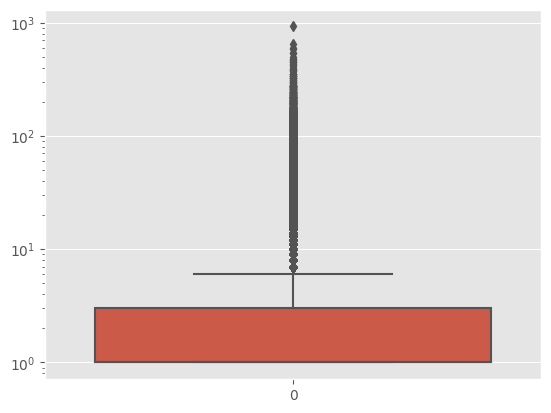

In [42]:
sns.boxplot(msd_data["repeats"])
plt.yscale("log")

In [17]:
msd_data.groupby("userId")["songId"].count().quantile(np.arange(0.5, 1.0, 0.1))

0.5    11.0
0.6    13.0
0.7    16.0
0.8    19.0
0.9    25.0
Name: songId, dtype: float64

In [21]:
msd_data.groupby("songId").size().quantile(np.arange(0.5, 1.0, 0.1))

0.5     2.0
0.6     3.0
0.7     4.0
0.8     8.0
0.9    16.0
dtype: float64

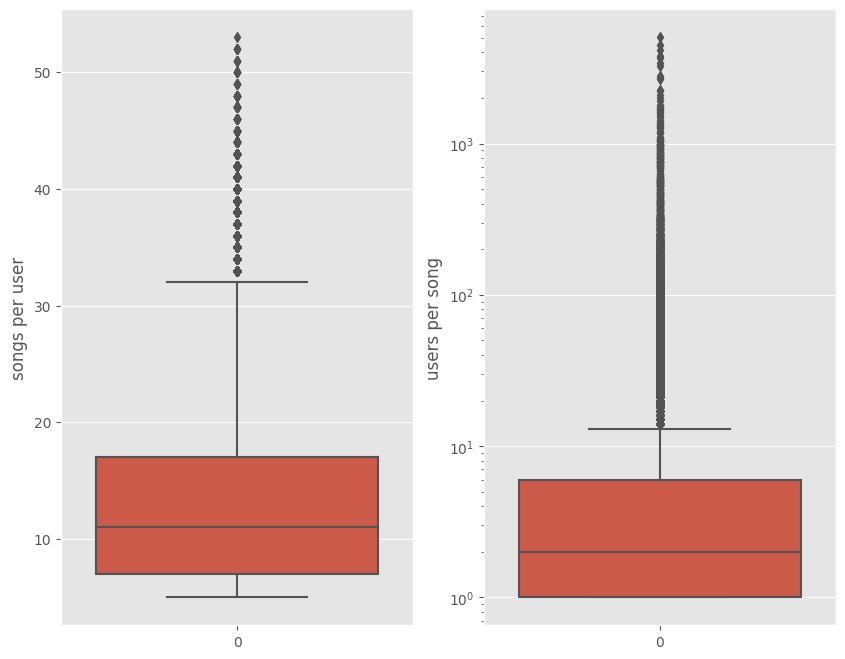

In [40]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.boxplot(msd_data.groupby("userId").size())
plt.ylabel("songs per user")
plt.subplot(1, 2, 2)
sns.boxplot(msd_data.groupby("songId").size())
plt.ylabel("users per song")
plt.yscale("log")

In [49]:
user_data = msd_data.groupby("userId")["repeats"].agg(["mean", "count"])

In [52]:
user_data.groupby("count")["mean"].agg(["mean", "std"])

,mean,std
count,,
5,3.197709,4.800122
6,3.240784,4.473337
7,3.231574,4.370597
8,3.284740,3.959209
9,3.307577,4.194651
10,3.211950,3.567519
11,3.249787,3.622902
12,3.295018,3.606385
13,3.248732,3.721351
